In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from dateutil import parser

In [3]:
from os import truncate
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [4]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#add a label column
fake_news['label'] = 0
true_news['label'] = 1

In [7]:
#combine datasets
data = pd.concat([fake_news, true_news], ignore_index=True)

In [8]:
#check for missing values
print(data.isnull().sum())

title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [9]:
#basic statistics
print(data.describe())

              label
count  44898.000000
mean       0.477015
std        0.499477
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


Handle different date format

In [13]:
def try_parse_date(date_str):
  try:
    return parser.parse(date_str)
  except ValueError:
    return None

data['date'] = data['date'].apply(try_parse_date)

invalid_dates = data[data['date'].isna()]

In [14]:
data.isna().sum()

title       0
text        0
subject     0
date       10
label       0
dtype: int64

In [15]:
data = data.drop(invalid_dates.index)

In [16]:
data.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

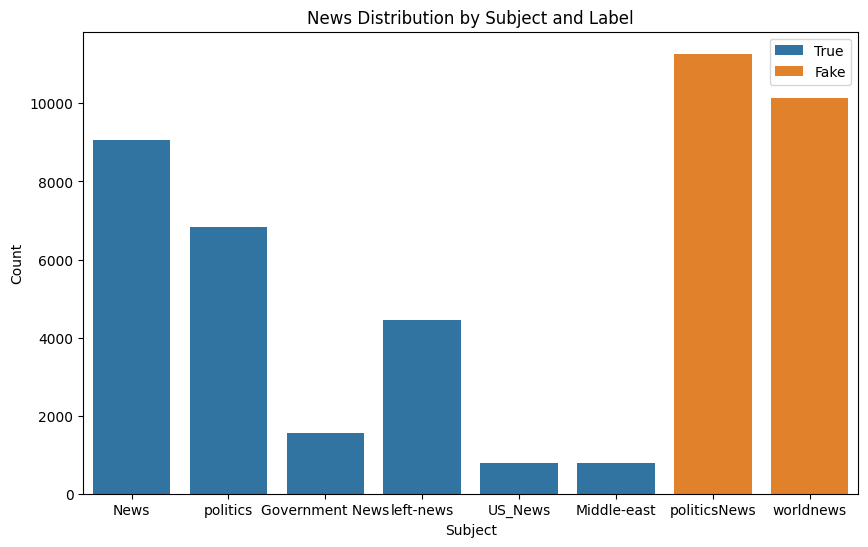

In [17]:
#visualuzation
plt.figure(figsize=(10,6))
sns.countplot(x='subject', hue = 'label', data = data)
plt.title('News Distribution by Subject and Label')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.legend(['True','Fake'])
plt.show()

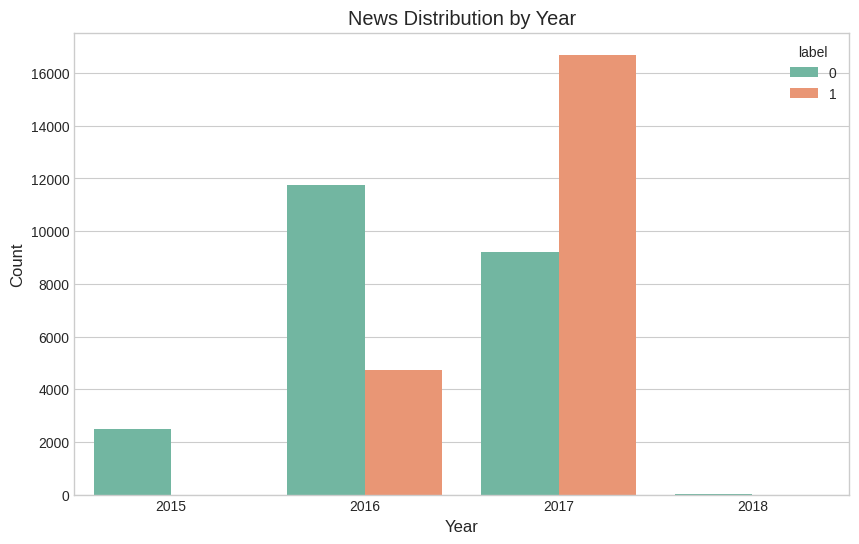

In [21]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-whitegrid')
sns.countplot(x=data['date'].dt.year, hue=data['label'], palette='Set2')
plt.title('News Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

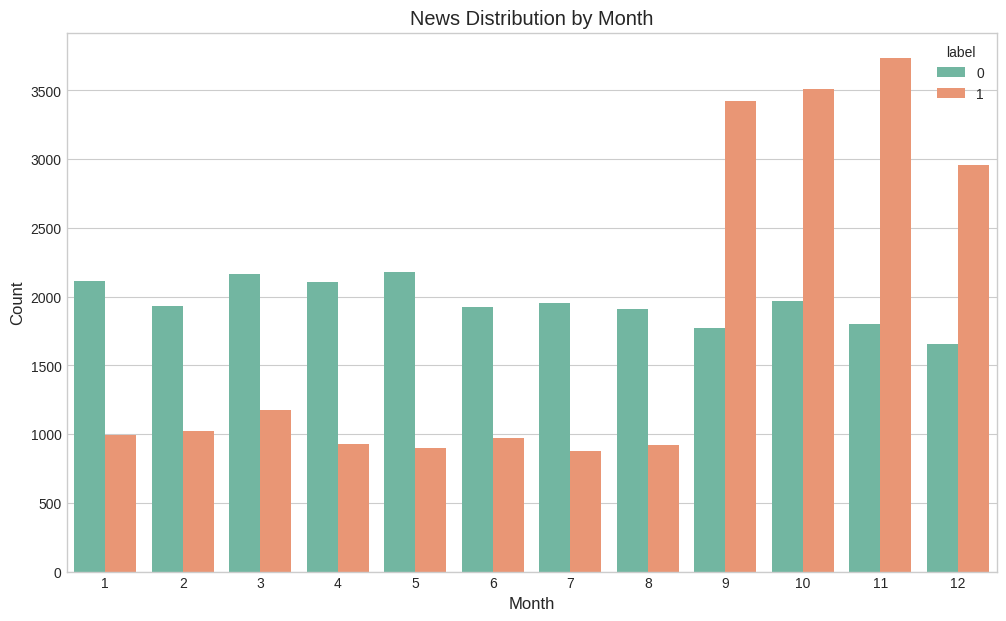

In [22]:
#correlation between months and news
plt.figure(figsize=(12,7))
plt.style.use('seaborn-whitegrid')
sns.countplot(x=data['date'].dt.month, hue=data['label'], palette='Set2')
plt.title('News Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')

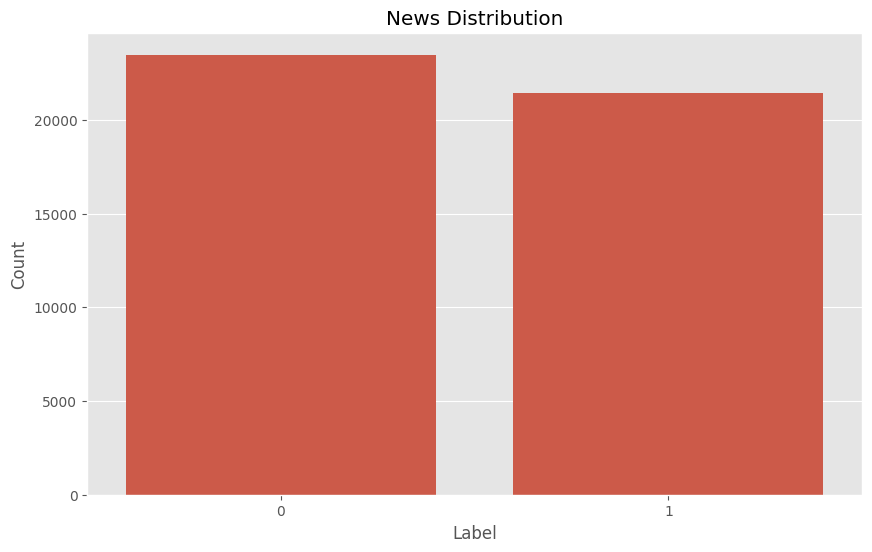

In [20]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=data)
plt.title('News Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()